In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)

In [3]:
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size = 100)

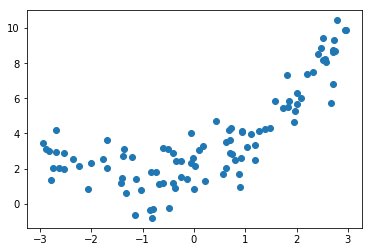

In [4]:
plt.scatter(x, y)
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
y_predict = lin_reg.predict(X)

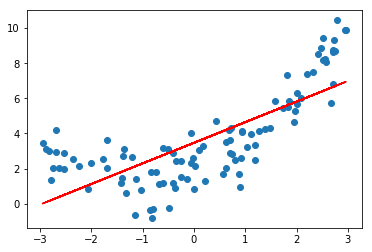

In [7]:
plt.scatter(x,y)
plt.plot(x, y_predict, color='r')
plt.show()

## 解决方案，添加一个特征

In [8]:
(X**2).shape

(100, 1)

In [9]:
X2 = np.hstack([X, X**2])

In [10]:
X2.shape

(100, 2)

In [11]:
line_reg2 = LinearRegression()
line_reg2.fit(X2, y)
y_predict2 = line_reg2.predict(X2)

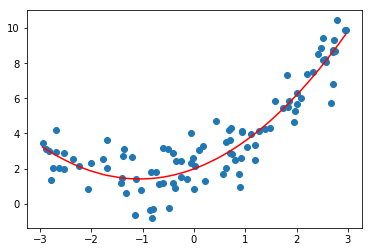

In [12]:
plt.scatter(x,y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [13]:
line_reg2.coef_

array([1.08323472, 0.50946238])

In [14]:
line_reg2.intercept_

1.979741562901126

## scikit-learn中的多项式回归和pipeline

In [15]:
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
X2 = poly.transform(X)

In [18]:
X2.shape

(100, 3)

In [19]:
X2[:5,:]

array([[ 1.        ,  0.11760425,  0.01383076],
       [ 1.        , -0.8028918 ,  0.64463524],
       [ 1.        , -2.8303729 ,  8.01101076],
       [ 1.        ,  1.49563576,  2.23692633],
       [ 1.        , -1.60863979,  2.58772199]])

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

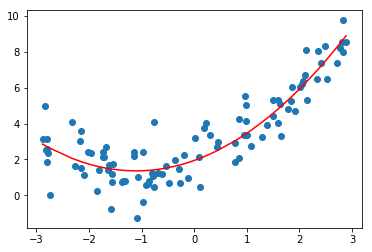

In [21]:
plt.scatter(x,y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [22]:
lin_reg2.coef_

array([0.        , 1.04549121, 0.47311904])

In [23]:
lin_reg2.intercept_

1.9425694513754177

## 关于PolynomialFeatures

In [24]:
X = np.arange(1, 11).reshape(-1, 2)

In [25]:
X.shape

(5, 2)

In [26]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [27]:
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
X2 = poly.transform(X)

In [28]:
X2.shape

(5, 6)

In [29]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

## Pipeline

In [30]:
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree = 2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [32]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

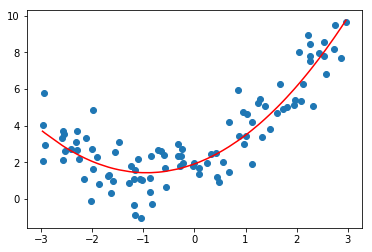

In [33]:
plt.scatter(x,y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

## 过拟合和欠拟合

In [34]:
np.random.seed(666)
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

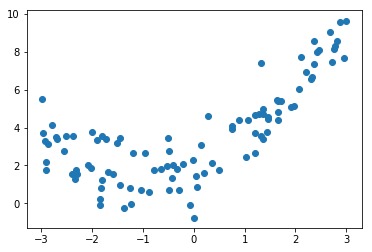

In [35]:
plt.scatter(x,y)
plt.show()

## 使用线性回归

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X,y)

0.4953707811865009

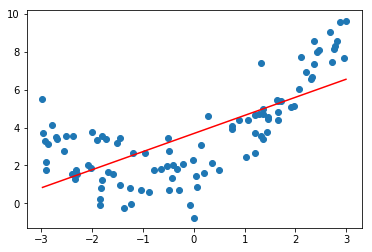

In [37]:
y_predict = lin_reg.predict(X)
plt.scatter(x,y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

## 使用多项式回归

In [39]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree = degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [40]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [41]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.0987392142417858

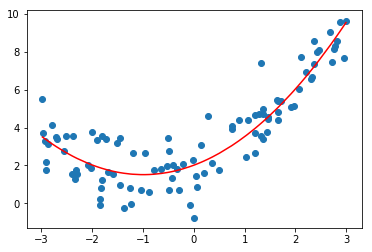

In [42]:
plt.scatter(x,y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

In [43]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

1.0508466763764153

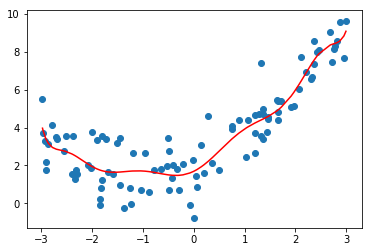

In [44]:
plt.scatter(x,y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

In [45]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6872896148546466

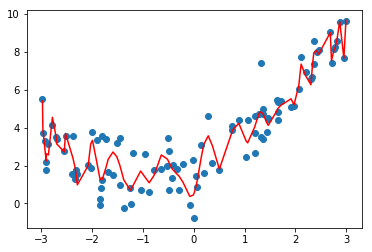

In [46]:
plt.scatter(x,y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

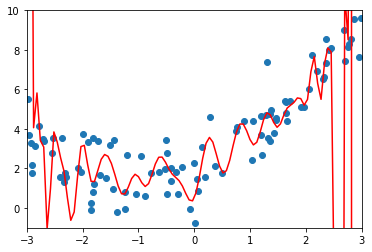

In [47]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

plt.scatter(x,y)
plt.plot(X_plot[:, 0], y_plot, color='r')
plt.axis([-3, 3, -1, 10])
plt.show()

## train test split的意义

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)

In [50]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2.2199965269396573

In [51]:
poly2_reg = PolynomialRegression(degree = 2)
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)vfv  

0.80356410562979

In [52]:
poly10_reg = PolynomialRegression(degree = 10)
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.9212930722150791

In [53]:
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

14075796398.031963

In [54]:
np.random.seed(666)
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size = 100)

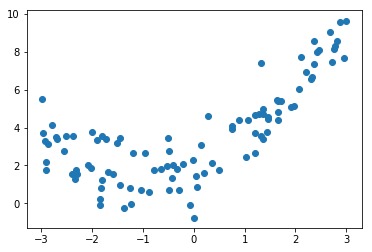

In [55]:
plt.scatter(x, y)
plt.show()

## 学习曲线

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [58]:
X_train.shape

(75, 1)

In [65]:
train_score = []
test_score = []
for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

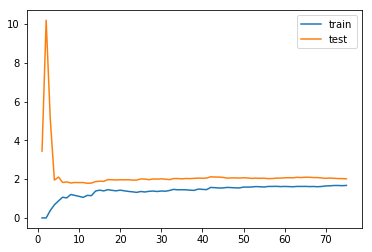

In [66]:
plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label="train")
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label="test")
plt.legend()
plt.show()

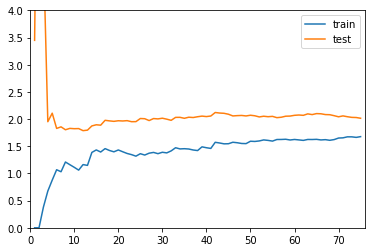

In [67]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(test_score), label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.show()
    
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

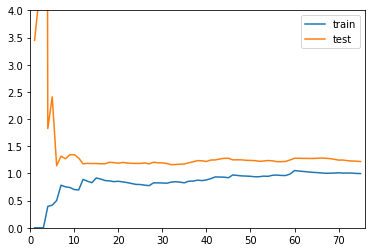

In [68]:
poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

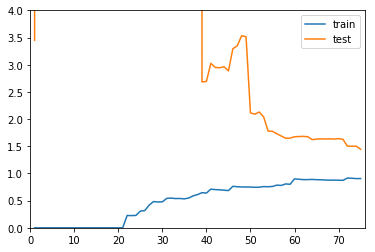

In [69]:
poly20_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly20_reg, X_train, X_test, y_train, y_test)